\newpage

### (1)

Classification problem: Predict whether a patient has heart disease based on features such as age, sex, and chest pain type.

### (2)

We will transform the 'num' variable into a binary outcome.

### (3)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [29]:
df = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv")

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        299 non-null    float64
 12  thal      301 non-null    float64
 13  num       303 non-null    int64  
dtypes: float64(3), int64(11)
memory usage: 33.3 KB


In [31]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [32]:
df.shape

(303, 14)

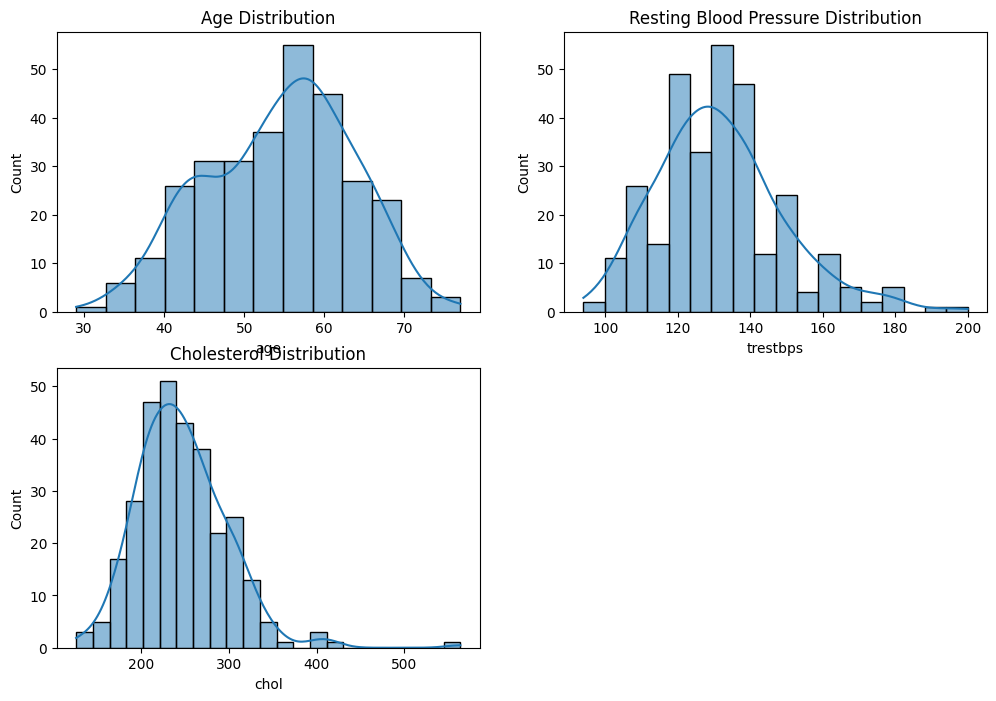

In [33]:
# plot the distributions of some variables
plt.figure(figsize=(12, 8))
plt.subplot(2, 2, 1)
sns.histplot(df['age'], kde=True)
plt.title('Age Distribution')

plt.subplot(2, 2, 2)
sns.histplot(df['trestbps'], kde=True)
plt.title('Resting Blood Pressure Distribution')

plt.subplot(2, 2, 3)
sns.histplot(df['chol'], kde=True)
plt.title('Cholesterol Distribution')

plt.show()

The dataset contains 303 rows and 14 variables. All the variables are stored as numeric. The average age is 54, the average chol is 247, the average trestbps is 132. The distribution of age is approximate normal, the distribution of trestbps and chol are right skewed.

### (4)

In [41]:
df['num'] = df['num'].apply(lambda x: 1 if x in [1, 2, 3, 4] else 0)

### (5)

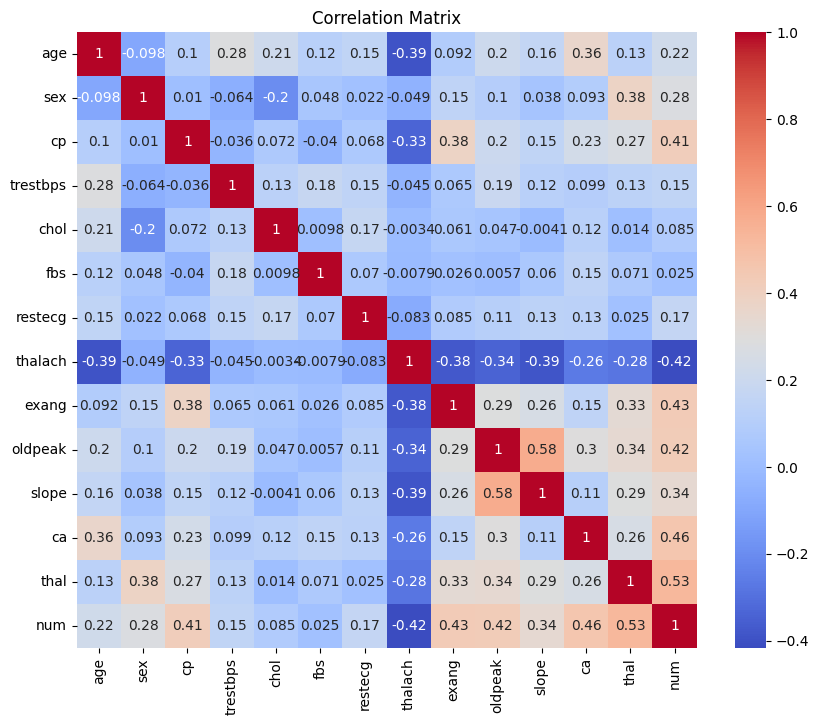

In [9]:
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The correlation coefficient matrix tells us that the target variable num is moderate positively associated with ca and thal. There is a moderate negative relationship between num and thalach.

### (6)

In [34]:
df = df.dropna()
df.shape

(297, 14)

Number of observations after dropping missing values: 279.

## (7)

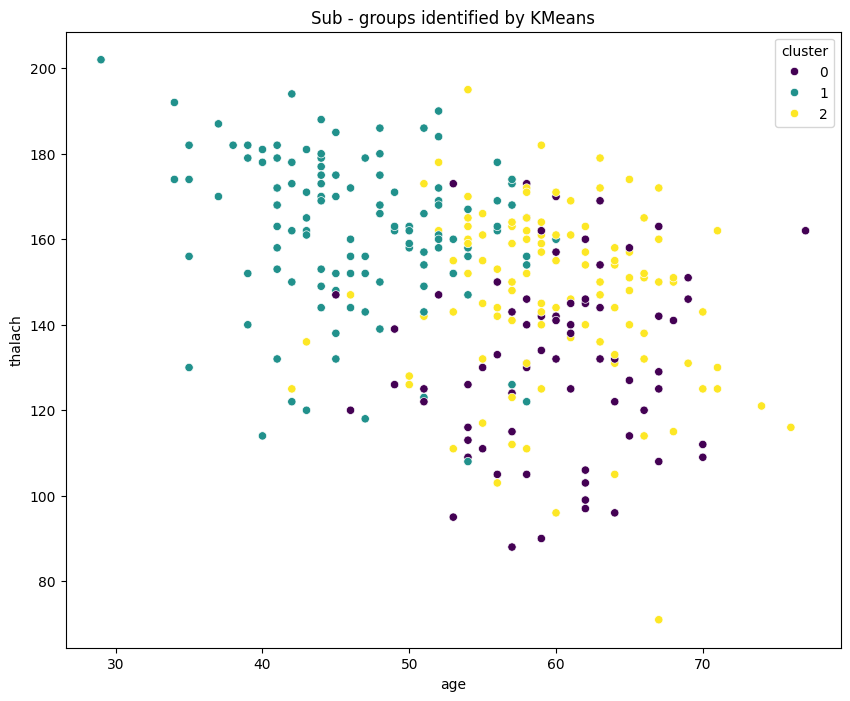

In [35]:
numerical_columns = ["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]
numerical_df = df[numerical_columns]
scaler = StandardScaler()
scaled_numerical_df = scaler.fit_transform(numerical_df)
kmeans = KMeans(n_clusters=3, random_state=1)
df['cluster'] = kmeans.fit_predict(scaled_numerical_df)
# visualize the clustering results
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='thalach', hue='cluster', data=df, palette='viridis')
plt.title('Sub - groups identified by KMeans')
plt.show()


### (8)

In [44]:
X = df.drop(['num', 'cluster'], axis=1)
y = df['num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

### (9)

We selected Logistic Regression and Decision Tree Classifier here.

Logistic Regression is selected because it is a linear model, and the coefficients can directly explain the impact of each feature on the classification result.

Decision Tree Classifier is selected because it can generate an intuitive decision tree, which is convenient for understanding the decision-making process.

### (10)

We will use the following two metrics:

- Accuracy: The proportion of correctly classified samples to the total number of samples. Formula: Accuracy = (TP + TN) / (TP + TN + FP + FN).

- Precision: The proportion of actual positive samples among the samples predicted as positive. Formula: Precision = TP / (TP + FP).

where TP = True Positives, TN = True Negatives, FP = False Positives, FN = False Negatives
